# Import Librairies

In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [35]:
import seaborn as sns

# Import Dataset(s)

In [36]:
"""# monter le disque googleDrive
drive.mount('/content/drive')
#%cd /content/drive/Shareddrives/Ecole\ IA\ 4 Bordeaux/Partage\ Etudiants/       # PATH TO SHARED DRIVE
%cd /content/drive/MyDrive/Colab Notebooks/Data/Simplon_brief"""

"# monter le disque googleDrive\ndrive.mount('/content/drive')\n#%cd /content/drive/Shareddrives/Ecole\\ IA\\ 4 Bordeaux/Partage\\ Etudiants/       # PATH TO SHARED DRIVE\n%cd /content/drive/MyDrive/Colab Notebooks/Data/Simplon_brief"

In [37]:
data = pd.read_csv("Data/billionaire_list_20yrs.csv")
data.info()
#data.head(5)


        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352369 entries, 0 to 352368
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Unnamed: 0             352369 non-null  int64 
 1   name                   352369 non-null  object
 2   last_name              341519 non-null  object
 3   age                    352369 non-null  int64 
 4   gender                 340477 non-null  object
 5   time                   352369 non-null  int64 
 6   permanent_country      304678 non-null  object
 7   company                326869 non-null  object
 8   main_industry          352369 non-null  object
 9   wealth_source_details  341447 non-null  object
 10  industry               352320 non-null  object
 11  state                  159190 non-null  object
 12  headquarters           133655 non-null  object
 13  countries              352369 non-null  object
 14  annual_income          352369 non-null  int64 
 15  

In [38]:
for col in data.columns:
    if data[col].isnull().sum() > 0:
        print(f"{col} has {round(100*data[col].isnull().sum()/data[col].count())} % valeurs nulles")

last_name has 3 % valeurs nulles
gender has 3 % valeurs nulles
permanent_country has 16 % valeurs nulles
company has 8 % valeurs nulles
wealth_source_details has 3 % valeurs nulles
industry has 0 % valeurs nulles
state has 121 % valeurs nulles
headquarters has 164 % valeurs nulles


# Data cleaning

In [39]:
# remove duplicate columns (because of daily_income, each name appear many times a year)
data.drop_duplicates(['name','annual_income'], inplace=True)

# make age real for today (year 2024)
data.age = 2023 - data.birth_year

# remove columns with redondent information
display(data[['name','last_name','name_cleaned']].sample(5))  # name_cleaned took care of removing "," and "()"
data.drop(['name','last_name'], axis=1, inplace=True)
data.name_cleaned = data.name_cleaned.apply(lambda x: x.replace("-"," ").capitalize()) # make name pretty

# remove unnecessary columns
data.drop(['company','wealth_source_details','industry','state','headquarters','daily_income','birth_year'], axis=1, inplace=True)
data.info()

# mettre l'argent en billion de dollars
data.annual_income /= 1e9

,name,last_name,name_cleaned
335603,Wen Yibo,Wen,wen_yibo
150420,Jerry Moyes,Moyes,jerry_moyes
71166,David Girouard,Girouard,david_girouard
24735,Andrei Skoch,Skoch & family,andrei_skoch_family
229847,Murat Ulker,Ulker,murat_ulker


<class 'pandas.core.frame.DataFrame'>
Index: 30912 entries, 0 to 352352
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         30912 non-null  int64 
 1   age                30912 non-null  int64 
 2   gender             28112 non-null  object
 3   time               30912 non-null  int64 
 4   permanent_country  25428 non-null  object
 5   main_industry      30912 non-null  object
 6   countries          30912 non-null  object
 7   annual_income      30912 non-null  int64 
 8   name_cleaned       30912 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.4+ MB


In [40]:
# quelle est la proportion de valeurs nulles ?
print("verifie la proportion de valeurs nulles")
for col in data.columns:
    if data[col].isnull().sum() > 0:
        print(f"{col} has {round(100*data[col].isnull().sum()/data[col].count())} % valeurs nulles")

verifie la proportion de valeurs nulles
gender has 10 % valeurs nulles
permanent_country has 22 % valeurs nulles


In [41]:
### remmetre les pays là ou il y a des valeur manquantes
display(data[['permanent_country','countries']].sample(5))

# reinitialise les codes pays avec le dernier element de la liste spearé par ';'
data.countries = data.countries.apply(lambda x: str(x).split(";")[0])
# reinitialise les noms pays avec le premier element de la liste spearé par '-'
data.permanent_country = data.permanent_country.apply(lambda x: str(x).split("-")[0])

#construit dictionnaire des noms de pays en fonction des codes pays
country_dict = {}
for name,code in zip(data.permanent_country, data.countries):
    if name != 'nan':
        country_dict[code] = name

display(country_dict)

# attribue le nom de pays en fonction du code pays
data['permanent_country_good'] = [country_dict[code] for code in data['countries']]
display(data[['permanent_country','permanent_country_good','countries']].sample(20))
data.drop(['countries'], axis=1, inplace=True)

# check values were filled


,permanent_country,countries
76122,USA-Youngstown;United States-Ohio-Youngstown,usa
195735,United Kingdom-London,mco;gbr
149797,United States-California-Los Angeles,mex;usa
210563,NaN,usa
245571,China-Beijing,chn


{'are': 'United Arab Emirates',
 'chn': 'China',
 'ita': 'Italy',
 'mex': 'Mexico',
 'usa': 'United States',
 'fra': 'France',
 'gbr': 'United Kingdom',
 'ind': 'India',
 'deu': 'Germany',
 'arg': 'Mexico',
 'che': 'Switzerland',
 'tha': 'Thailand',
 'bra': 'Brazil',
 'chl': 'Chile',
 'nor': 'Norway',
 'jpn': 'Japan',
 'irl': 'United States',
 'nld': 'Netherlands',
 'idn': 'Indonesia',
 'mys': 'Malaysia',
 'kor': 'South Korea',
 'aus': 'Melbourne',
 'sgp': 'China',
 'mar': 'Morocco',
 'rus': 'Russia',
 'mco': 'Monaco',
 'sau': 'Saudi Arabia',
 'nga': 'Nigeria',
 'isr': 'Israel',
 'dnk': 'Denmark',
 'tur': 'Turkey',
 'can': 'China',
 'esp': 'Spain',
 'kaz': 'Kazakhstan',
 'prt': 'Portugal',
 'per': 'Peru',
 'cze': 'Czech Republic',
 'phl': 'Philippines',
 'swe': 'Sweden',
 'fin': 'Finland',
 'grc': 'Brazil',
 'lbn': 'Lebanon',
 'bel': 'Kazakhstan',
 'kwt': 'Kuwait',
 'geo': 'Kazakhstan',
 'npl': 'Nepal',
 'col': 'Colombia',
 'zaf': 'South Africa',
 'lie': 'Liechtenstein',
 'nzl': 'Singa

KeyError: 'ury'

In [ ]:
data.info()

In [ ]:
"""names = [x for x in data.loc[data.gender.isnull(),'name_cleaned'].value_counts().index]
print("ATTENTION : il y a des doublos dans les noms?!?")

def choisi_nom(names):
    print("type 'm' for man and 'w' for woman")
    lst=[]
    for name in names:
        choice = input(f"man or woman : {name}")
        if choice == "m" or choice == "M":
            lst.append("M")
        elif choice == "w" or choice == "W":
            lst.append("W")
        else:
            lst.append("M/F")
    return lst

sexe_prenoms = choisi_nom(names)"""

In [ ]:
# umputer valeur par defaut 'M;F' aux valeurs manquantes
data.loc[data.gender.isnull(),'gender'] = 'M;F'

In [ ]:
data.info()

In [ ]:
data.permanent_country = data.permanent_country.apply(lambda x : str(x).split('-')[0])
#display(data[['countries','permanent_country']].sample(20))
#on utilise le code country usa pour attribuer United States aux permanent country qui sonot nan
#data.loc[data.permanent_country.isnull()]  # il n'y a pas de valeur nulle alors on regarde avec la string 'nan'
#data.loc[(data.permanent_country == 'nan')&(data.countries == 'usa')][['countries','permanent_country']].sample(20)
data.loc[(data.permanent_country == 'nan')&(data.countries == 'usa'), 'permanent_country'] = 'United States'
data.loc[data.permanent_country == 'USA', 'permanent_country'] = 'United States'

display(data[['countries','permanent_country']].sample(20))
data.loc[(data.permanent_country == 'nan')&(data.countries == 'fra'), 'permanent_country'] = 'France'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'aus'), 'permanent_country'] = 'Australia'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'esp'), 'permanent_country'] = 'Espagne'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'ind'), 'permanent_country'] = 'India'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'deu'), 'permanent_country'] = 'Germany'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'prt'), 'permanent_country'] = 'Portugal'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'rus'), 'permanent_country'] = 'Russia'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'kor'), 'permanent_country'] = 'Korea'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'can'), 'permanent_country'] = 'Canada'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'jpn'), 'permanent_country'] = 'Japan'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'tur'), 'permanent_country'] = 'Turkey'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'ita'), 'permanent_country'] = 'Italy'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'gbr'), 'permanent_country'] = 'Great Britain'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'bra'), 'permanent_country'] = 'Brazil'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'sgp'), 'permanent_country'] = 'Singapor'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'pol'), 'permanent_country'] = 'Poland'
data.loc[(data.permanent_country == 'nan')&(data.countries.str.startswith('chn')), 'permanent_country'] = 'China'

# Data eploration

In [ ]:

# Compter le nombre de milliardaires par pays pour 2022
top_countries = data['permanent_country'].value_counts().head(10)

plt.figure(figsize=(8, 4))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 des pays avec le plus de milliardaires entre 2002 et 2022')
plt.xlabel('Pays')
plt.ylabel('Nombre de milliardaires')
plt.show()

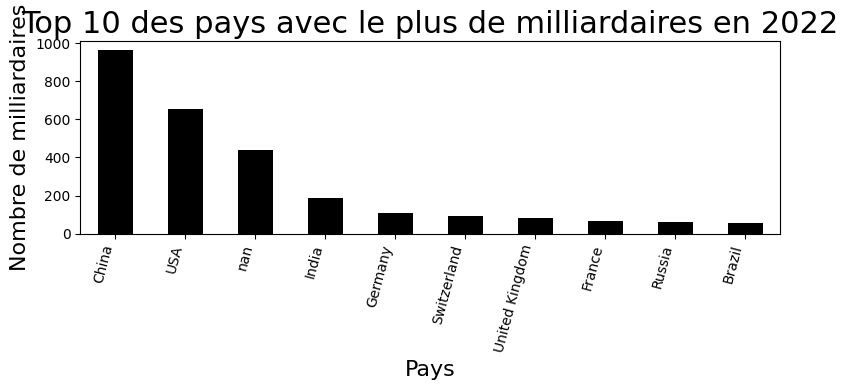

In [ ]:
#Suite pb d'affichage:
#Suppression des espaces
#Suppression des doublons USA / UNITED STATES en remplaçant l'un par l'autre
data["permanent_country"] = data["permanent_country"].str.strip() 
data["permanent_country"].replace({"United States": "USA"}, inplace=True)


data_2022 = data[data["time"] == 2022]
ax = top_countries_2022 = data_2022['permanent_country'].value_counts().head(10)

#GRAPH
plt.figure(figsize=(8, 4))
ax = top_countries_2022.plot(kind="bar", color="black")
plt.title("Top 10 des pays avec le plus de milliardaires en 2022", size=22)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right")
plt.xlabel("Pays", size=16)
plt.ylabel("Nombre de milliardaires", size=16)

plt.tight_layout()
plt.show()


<Axes: xlabel='time'>

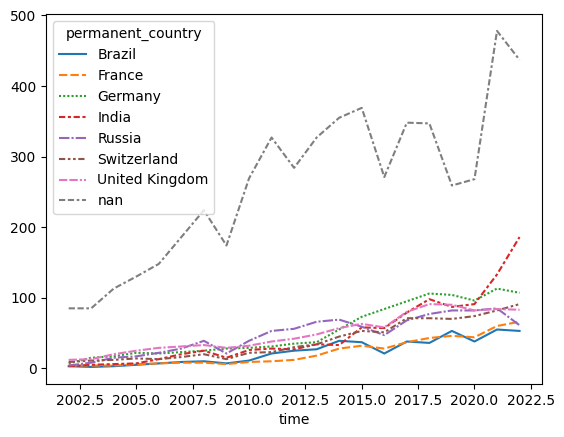

In [ ]:
to_plot = data.loc[data.permanent_country.isin(top_countries_2022.index[2:]),['time','permanent_country','name_cleaned']]
# to_plot.groupby(['time','permanent_country'])['name_cleaned'].count()
to_plot = to_plot.pivot_table(index='time', values='name_cleaned', columns='permanent_country', aggfunc='count')
sns.lineplot(to_plot)

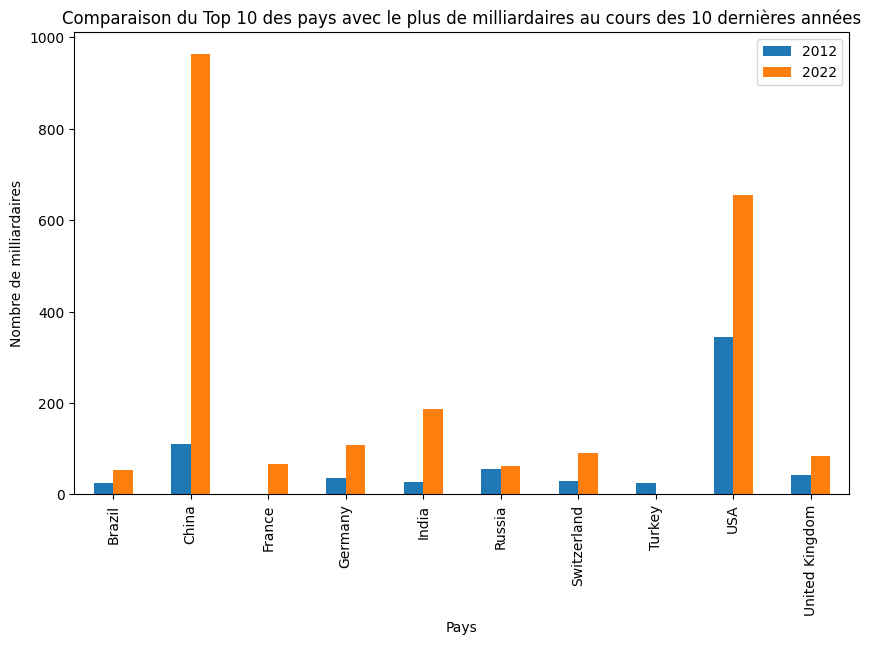

In [ ]:

df_2012 = data[data['time'] == 2012]
df_2022 = data[data['time'] == 2022]
#CLEAN
data['permanent_country'] = data['permanent_country'].str.strip()  # Supprimer les espaces inutiles au début et à la fin
data.loc[data['permanent_country'] == 'USA', 'Permanent_country'] = 'United States'

top_countries_2012 = df_2012['permanent_country'].value_counts().head(10)
top_countries_2022 = df_2022['permanent_country'].value_counts().head(10)

merged_data = pd.merge(top_countries_2012, top_countries_2022, left_index=True, right_index=True, how='outer').head(10)
merged_data.columns = ['2012', '2022']

merged_data.plot(kind='bar', figsize=(10, 6))
plt.title('Comparaison du Top 10 des pays avec le plus de milliardaires au cours des 10 dernières années')
plt.xlabel('Pays')
plt.ylabel('Nombre de milliardaires')
plt.show()


<Figure size 1200x800 with 0 Axes>

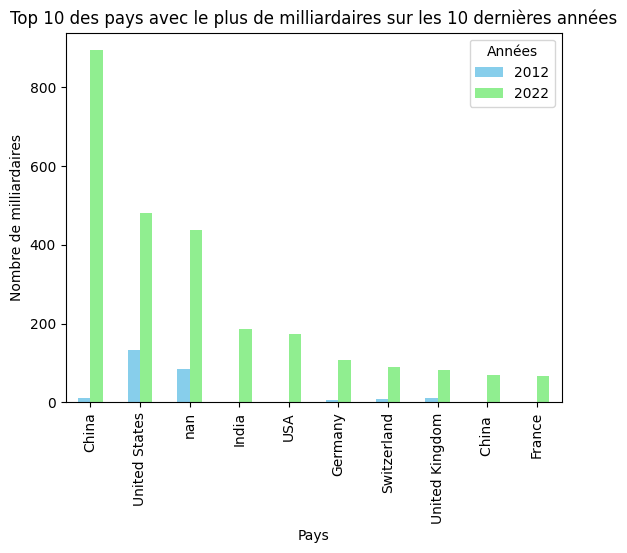

In [ ]:
#COURBES
# Filtrer les données pour les années 2021 et 2022
df_2012 = data[data['time'] == 2002]
df_2022 = data[data['time'] == 2022]

# Compter le nombre de milliardaires par pays pour 2021 et 2022
top_countries_2012 = df_2012['permanent_country'].value_counts().head(10)
top_countries_2022 = df_2022['permanent_country'].value_counts().head(10)

# Fusionner les données des deux années et réordonner les pays par ordre décroissant
top_countries_combined = pd.concat([top_countries_2012, top_countries_2022], axis=1)
top_countries_combined.columns = ['2012', '2022']
top_countries_combined = top_countries_combined.fillna(0)
top_countries_combined['Difference'] = top_countries_combined['2022'] - top_countries_combined['2012']
top_countries_combined = top_countries_combined.sort_values('2022', ascending=False).head(10)

# Créer un graphique à barres pour visualiser les résultats
plt.figure(figsize=(12, 8))
top_countries_combined[['2012', '2022']].plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Top 10 des pays avec le plus de milliardaires sur les 10 dernières années')
plt.xlabel('Pays')
plt.ylabel('Nombre de milliardaires')
plt.legend(title='Années')
plt.show()


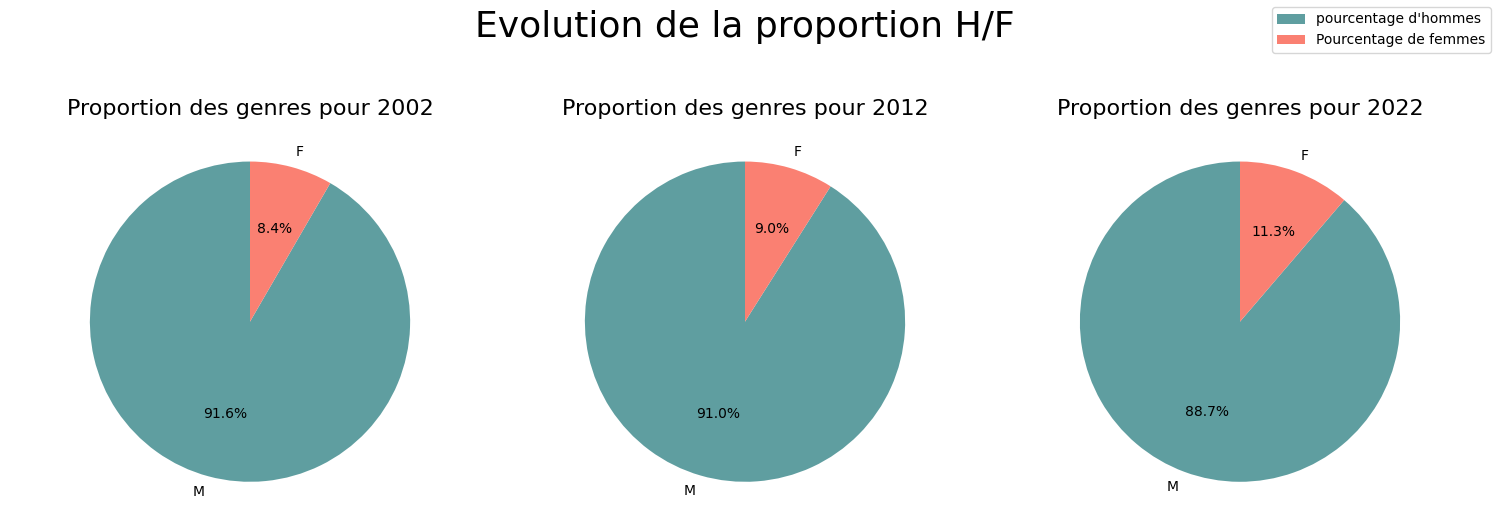

In [ ]:
years = [2002, 2012, 2022]
colors = ["cadetblue", "salmon"]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# On effectue une boucle afin d'obtenir un graphique pour les 3 années 
for i, year in enumerate(years):
    
    data_filtered = data.loc[data["time"] == year]
    data_filtered = data_filtered[data_filtered["gender"].isin(["F", "M"])]

    proportions = data_filtered["gender"].value_counts(normalize=True)

    axes[i].pie(proportions, labels=proportions.index, autopct="%1.1f%%", startangle=90, colors=colors)
    axes[i].axis("equal")
    axes[i].set_title(f"Proportion des genres pour {year}", size=16)

fig.suptitle("Evolution de la proportion H/F", fontsize=26, y=1.05)
fig.legend(["pourcentage d'hommes", "Pourcentage de femmes"], loc="upper right")

plt.tight_layout()
plt.show()

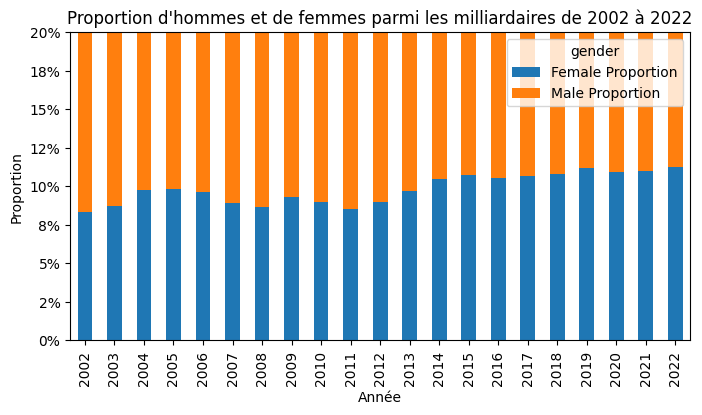

In [ ]:
import matplotlib.ticker as mtick
# Filtrer les données pour les années de votre choix
df_years = data[(data['time'] >= 2002) & (data['time'] <= 2022)]

# Regrouper les données par année et par genre, puis compter le nombre de milliardaires de chaque genre
grouped_data = df_years.groupby(['time', 'gender']).size().unstack()

# Calculer la proportion d'hommes et de femmes
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data['Female Proportion'] = grouped_data['F'] / grouped_data['Total']
grouped_data['Male Proportion'] = grouped_data['M'] / grouped_data['Total']

# Créer un graphique à barres empilées pour visualiser les proportions
ax = grouped_data[['Female Proportion', 'Male Proportion']].plot(kind='bar', stacked=True, figsize=(8, 4))

# Formater l'axe des y pour afficher les pourcentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Ajouter le titre, les étiquettes des axes et la limite sur l'axe y
plt.title('Proportion d\'hommes et de femmes parmi les milliardaires de 2002 à 2022')
plt.xlabel('Année')
plt.ylabel('Proportion')
plt.ylim((0, 0.2))

# Afficher le graphique
plt.show()


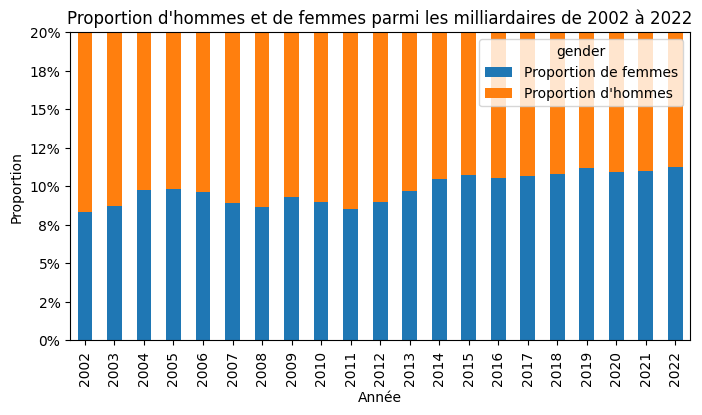

In [42]:
import matplotlib.ticker as mtick


data_years = data[(data["time"] >= 2002) & (data["time"] <= 2022)]
grouped_data = data_years.groupby(["time", "gender"]).size().unstack()

grouped_data["Total"] = grouped_data.sum(axis=1)
grouped_data["Proportion de femmes"] = grouped_data["F"] / grouped_data["Total"]
grouped_data["Proportion d'hommes"] = grouped_data["M"] / grouped_data["Total"]

ax = grouped_data[["Proportion de femmes", "Proportion d'hommes"]].plot(kind="bar", stacked=True, figsize=(8, 4))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

plt.title("Proportion d\'hommes et de femmes parmi les milliardaires de 2002 à 2022")
plt.xlabel("Année")
plt.ylabel("Proportion")
plt.ylim((0, 0.2))

plt.show()

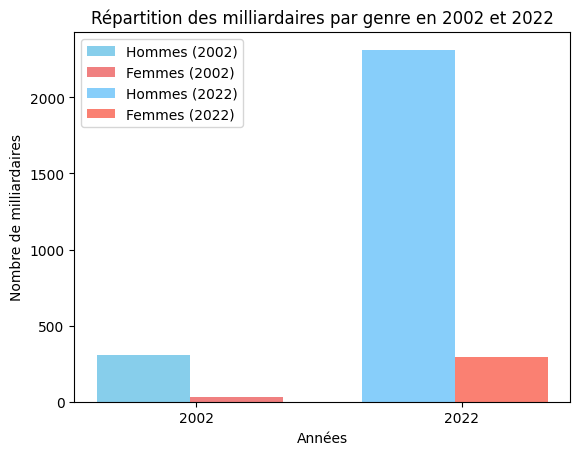

In [ ]:

# Filtrer les données pour les années 2002 et 2022
df_2002 = data[data['time'] == 2002]
df_2022 = data[data['time'] == 2022]

# Compter le nombre de milliardaires par genre pour 2002 et 2022
male_count_2002 = df_2002[df_2002['gender'] == 'M'].shape[0]
female_count_2002 = df_2002[df_2002['gender'] == 'F'].shape[0]

male_count_2022 = df_2022[df_2022['gender'] == 'M'].shape[0]
female_count_2022 = df_2022[df_2022['gender'] == 'F'].shape[0]

# Créer un graphique à barres côte à côte pour visualiser les proportions en 2002 et 2022
fig, ax = plt.subplots()
bar_width = 0.35
index = [1, 2]

bar1 = ax.bar(index[0], male_count_2002, bar_width, label='Hommes (2002)', color='skyblue')
bar2 = ax.bar(index[0] + bar_width, female_count_2002, bar_width, label='Femmes (2002)', color='lightcoral')
bar3 = ax.bar(index[1], male_count_2022, bar_width, label='Hommes (2022)', color='lightskyblue')
bar4 = ax.bar(index[1] + bar_width, female_count_2022, bar_width, label='Femmes (2022)', color='salmon')

ax.set_xlabel('Années')
ax.set_ylabel('Nombre de milliardaires')
ax.set_title('Répartition des milliardaires par genre en 2002 et 2022')
ax.set_xticks([1.2, 2.2])
ax.set_xticklabels(['2002', '2022'])
ax.legend()

plt.show()
